<a href="https://colab.research.google.com/github/surisingh405/employess-burnout-analysis/blob/main/BONDILI_SURENDRANATH_SINGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing The Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# ***Taking The Dataset***

In [3]:
pd.set_option('display.max_columns', None)
burnoutDf=pd.read_csv('/content/employee_burnout_analysis.csv')
burnoutDf


Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      30-09-2008  Female      Service   
1          fffe3700360033003500      30-11-2008    Male      Service   
2      fffe31003300320037003900      10-03-2008  Female      Product   
3      fffe32003400380032003900      03-11-2008    Male      Service   
4      fffe31003900340031003600      24-07-2008  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      30-12-2008  Female      Service   
22746  fffe33003000350031003800      19-01-2008  Female      Product   
22747          fffe390032003000      05-11-2008    Male      Service   
22748  fffe33003300320036003900      10-01-2008  Female      Service   
22749      fffe3400350031003800      06-01-2008    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1                     Yes            1                  2.0   
2                     Yes            2                  NaN   
3                     Yes            1                  1.0   
4                      No            3                  7.0   
...                   ...          ...                  ...   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

In [4]:
# Convert into datetime ddataType
burnoutDf["Date of Joiniing"]= pd.to_datetime(burnoutDf["Date of Joining"])

In [5]:
#give the number of rows and columns
burnoutDf.shape

(22750, 10)

In [6]:
# general iinformation
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  object        
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
 9   Date of Joiniing      22750 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.7+ MB


In [7]:
# show top 5 rows
burnoutDf.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      30-09-2008  Female      Service   
1      fffe3700360033003500      30-11-2008    Male      Service   
2  fffe31003300320037003900      10-03-2008  Female      Product   
3  fffe32003400380032003900      03-11-2008    Male      Service   
4  fffe31003900340031003600      24-07-2008  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate Date of Joiniing  
0       0.16       2008-09-30  
1       0.36       2008-11-30  
2       0.49       2008-10-03  
3       0.20       2008-03-11  
4       0.52       2008-07-24

In [8]:
# extract all columns of the dataset
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Date of Joiniing'],
      dtype='object')

In [9]:
# check for null values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
Date of Joiniing           0
dtype: int64

In [10]:
# check the duplicate values
burnoutDf.duplicated().sum()

0

In [11]:
# calculate the mean , std , min , max and count of every attrubutes
burnoutDf.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [12]:
# show the unique values
for i, col in enumerate(burnoutDf.columns):
  print(f"\n\n\{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



\['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




\['30-09-2008' '30-11-2008' '10-03-2008' '03-11-2008' '24-07-2008'
 '26-11-2008' '02-01-2008' '31-10-2008' '27-12-2008' '09-03-2008'
 '16-03-2008' '12-05-2008' '20-01-2008' '23-02-2008' '14-05-2008'
 '03-02-2008' '17-03-2008' '28-03-2008' '29-05-2008' '27-06-2008'
 '31-08-2008' '15-01-2008' '04-05-2008' '17-11-2008' '14-09-2008'
 '09-10-2008' '11-10-2008' '18-09-2008' '16-09-2008' '16-12-2008'
 '03-05-2008' '04-08-2008' '31-07-2008' '17-06-2008' '28-04-2008

In [13]:
# drop irrelevant column
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [14]:
# check the skewness of the attributes
intFloatburnoutDf=burnoutDf.select_dtypes([np.int, np.float])
for i, col in enumerate(intFloatburnoutDf.columns):
  if (intFloatburnoutDf[col].skew() >= 0.1):
    print("\n",col, "feature is Positively skewed and value is; ", intFloatburnoutDf[col].skew())
  elif (intFloatburnoutDf[col].skew() <= -0.1):
    print("\n",col, "feature is Negatively skewed and value is; ", intFloatburnoutDf[col].skew())
  else:
    print("\n",col, "feature is Normally Distributed and value is; ", intFloatburnoutDf[col].skew())


 Designation feature is Normally Distributed and value is;  0.09242138478903683

 Resource Allocation feature is Positively skewed and value is;  0.20457273454318103

 Mental Fatigue Score feature is Negatively skewed and value is;  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is;  0.045737370909640515


In [15]:
# Replace the null values with mean
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(),inplace=True)

In [16]:
# show the correlation
burnoutDf.corr()

Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.852046              0.656445   
Resource Allocation      0.852046             1.000000              0.739268   
Mental Fatigue Score     0.656445             0.739268              1.000000   
Burn Rate                0.719284             0.811062              0.878217   

                      Burn Rate  
Designation            0.719284  
Resource Allocation    0.811062  
Mental Fatigue Score   0.878217  
Burn Rate              1.000000

# ***Data Visualization***

In [17]:
# plotting Heat map to check Correlation
Corr=burnoutDf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(Corr, text_auto=True, aspect="auto")
fig.show()

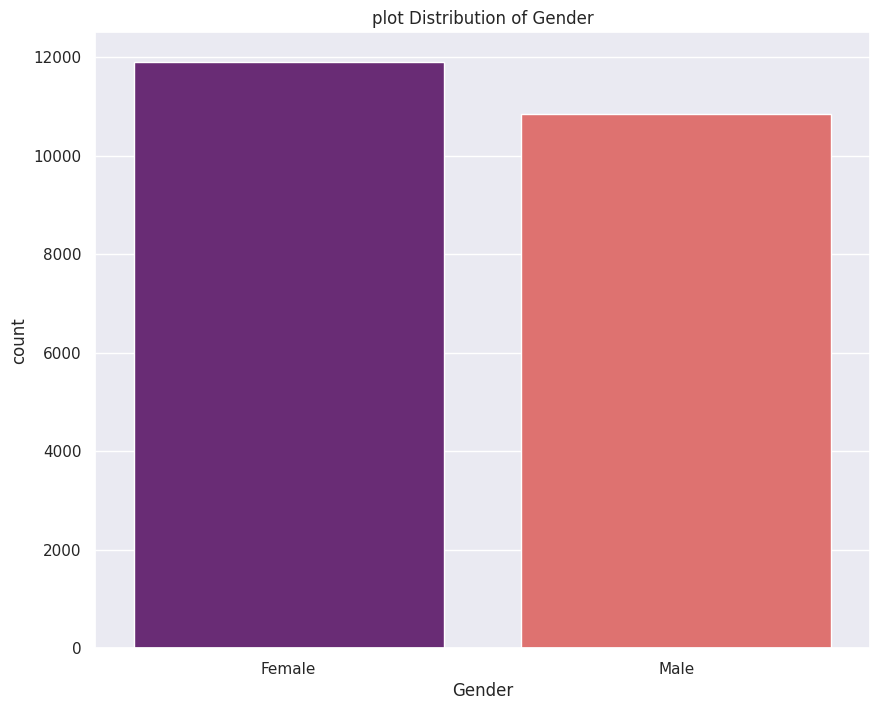

In [18]:
# Count plot distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDf, palette="magma")
plt.title("plot Distribution of Gender")
plt.show()

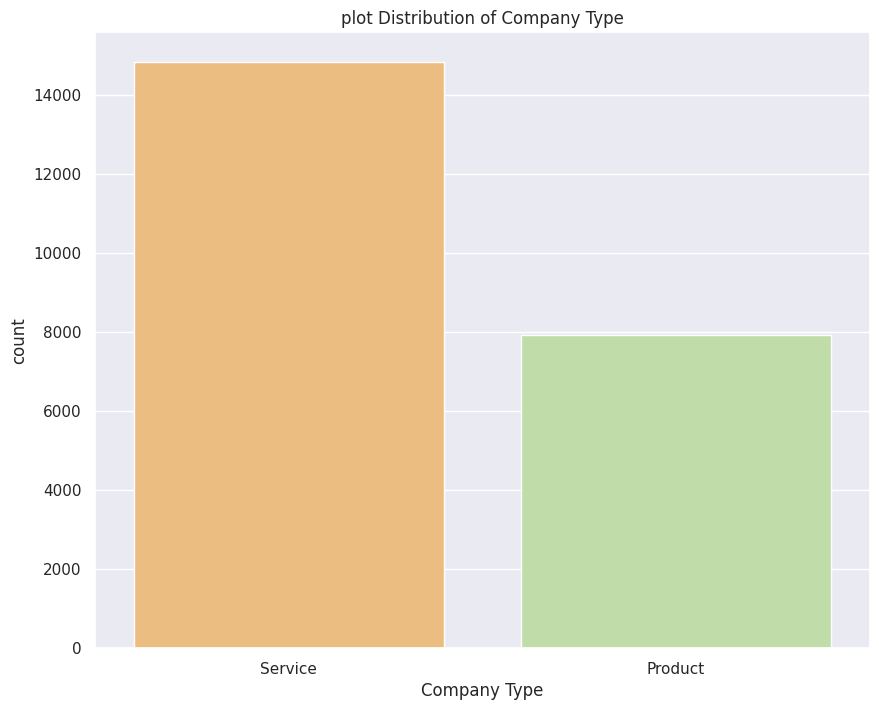

In [19]:
# Count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDf, palette="Spectral")
plt.title("plot Distribution of Company Type")
plt.show()

In [20]:
# Count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=burnoutDf, palette="dark:salmon_r")
plt.title("plot Distribution of WFH_Setup_Available")
plt.show()

In [21]:
# count-plot Distribution of attributes with the help of Histogram
burn_st=burnoutDf.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig = px.histogram(burn_st, x=col, title="plot Distribution of " +col, color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [22]:
# plot distribution of burn rate on the basis of Designation
fig = px.line(burnoutDf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
# plot distribution of burn rate on the basis of Gender
fig = px.line(burnoutDf, y="Burn Rate", color="Gender", title="Burn rate on the basis of Gender", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

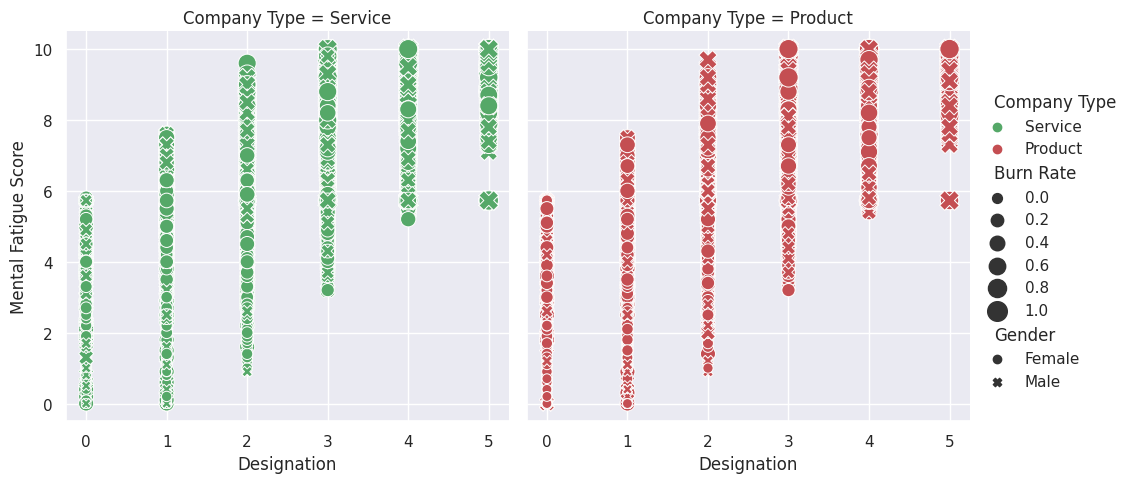

In [24]:
# plot Distribution of " Designation vs mental fatigue" as per company type , Burn rate and Gender
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50, 200)
)

# ***Label Encoding***

In [25]:
# label encoding and assign in new variable
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [26]:
# Assign in new variable
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)



In [27]:
# Check assigned values

gn = burnoutDf.groupby('Gender')
gn = gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [28]:
# Check assigned values
ct = burnoutDf.groupby('Company Type')
ct = ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [29]:
# check assigned values
wsa = burnoutDf.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [30]:
# show last 10 rows
burnoutDf.tail(22)

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
22728      26-08-2008    Male      Product                  No            2   
22729      27-02-2008  Female      Service                 Yes            1   
22730      07-10-2008    Male      Service                 Yes            2   
22731      24-01-2008    Male      Service                 Yes            2   
22732      21-12-2008  Female      Service                  No            2   
22733      16-07-2008  Female      Service                  No            2   
22734      07-12-2008    Male      Product                  No            3   
22735      26-07-2008    Male      Service                  No            3   
22736      18-04-2008    Male      Service                 Yes            4   
22737      17-08-2008  Female      Service                  No            3   
22738      23-12-2008    Male      Service                 Yes            0   
22739      06-02-2008    Male      Service                  No            2   
22740      05-09-2008  Female      Product                  No            3   
22741      07-01-2008    Male      Product                  No            2   
22742      28-07-2008    Male      Product                  No            3   
22743      15-12-2008  Female      Product                 Yes            1   
22744      27-05-2008    Male      Product                  No            3   
22745      30-12-2008  Female      Service                  No            1   
22746      19-01-2008  Female      Product                 Yes            3   
22747      05-11-2008    Male      Service                 Yes            3   
22748      10-01-2008  Female      Service                  No            2   
22749      06-01-2008    Male      Product                  No            3   

       Resource Allocation  Mental Fatigue Score  Burn Rate Date of Joiniing  \
22728                  6.0              6.000000   0.520000       2008-08-26   
22729                  3.0              4.000000   0.320000       2008-02-27   
22730                  4.0              5.300000   0.490000       2008-07-10   
22731                  4.0              5.500000   0.390000       2008-01-24   
22732                  4.0              6.300000   0.390000       2008-12-21   
22733                  3.0              4.500000   0.452005       2008-07-16   
22734                  7.0              6.500000   0.620000       2008-07-12   
22735                  7.0              7.300000   0.640000       2008-07-26   
22736                  7.0              7.700000   0.650000       2008-04-18   
22737                  5.0              5.728188   0.430000       2008-08-17   
22738                  1.0              4.900000   0.290000       2008-12-23   
22739                  5.0              8.500000   0.670000       2008-06-02   
22740                  6.0              7.300000   0.550000       2008-05-09   
22741                  5.0              6.000000   0.452005       2008-07-01   
22742                  5.0              8.100000   0.690000       2008-07-28   
22743                  3.0              6.000000   0.480000       2008-12-15   
22744                  7.0              6.200000   0.540000       2008-05-27   
22745                  3.0              5.728188   0.410000       2008-12-30   
22746                  6.0              6.700000   0.590000       2008-01-19   
22747                  7.0              5.728188   0.720000       2008-05-11   
22748                  5.0              5.900000   0.520000       2008-10-01   
22749                  6.0              7.800000   0.610000       2008-06-01   

       GenderLabel  Company_TypeLabel  WFH_Setup_AvailableLabel  
22728            1                  0                         0  
22729            0                  1                         1  
22730            1                  1                         1  
22731            1                  1                         1  
22732            

# ***Feature Selection***

In [31]:
# Feature Selection
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score',
         'GenderLabel', 'Company_TypeLabel', 'WFH_Setup_AvailableLabel']
x=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [32]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [33]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


# ***Implementing PCA***

In [34]:
# Principle component Analysis
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print("PCA shape of X is :",x_pca.shape, "and original shape is :", x.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("the number of features selected through PCA is:", pca.n_components_)



PCA shape of X is : (22750, 4) and original shape is : (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
the number of features selected through PCA is: 4


# ***Data Splitting***

In [35]:
from sklearn.model_selection import train_test_split
x_train_pca, X_test, Y_train, Y_test = train_test_split(x_pca,y, test_size = 0.25, random_state=10)


In [36]:
# print the shape of splitted data

print(x_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)
